# DSO110 - Final Group Project - Lottery
Alberta "Albi" Kovatcheva and Barbra Treston



## Background
Albi and Barbra have chosen the “Mega Millions Winning Numbers” dataset because the lottery is something that is familiar and accessible to a wide range of people worldwide; it would be difficult to find someone who hasn’t dreamed of hitting the jackpot and changing their life forever. However, it is also widely accepted that the lottery is not set up to favor the player.  In the case of Mega Millions, although there is a 1 in 24 chance of winning something, the odds of choosing all 6 numbers correctly to win the jackpot is 1 in 302,575,350 - a fact that is posted openly on both the New York Lottery and Mega Millions websites.  By analyzing the winning numbers data as well as complementary datasets on lottery retailers, lottery aid to local school districts, and monies recouped from the lottery winnings of public aid recipients, Albi and Barbra hope to glean insight to make actionable suggestions on how lottery players can get the best return on their investment as well as to demonstrate for the average person whether the lottery serves any societal good or whether it may be best to abstain from playing altogether. 





## Data Wrangling

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import math
import numpy as np
from numpy import nan
import datetime as dt
from datetime import date

### Import data.

### 1. Winning numbers May 17, 2002 to November 26, 2021

In [2]:
Winning_Numbers = pd.read_csv("Lottery_Mega_Millions_Winning_Numbers__Beginning_2002.csv")
pd.set_option("display.max_columns", None)
Winning_Numbers.head()

,Draw Date,Month,Day,Year,Weekday,Weekday.1,Quarter,Winning Numbers,Mega Ball,Multiplier,First,Second,Third,Fourth,Fifth
0,9/25/2020,9,25,2020,Fri,1,3,20 36 37 48 67,16,2.0,20,36,37,48,67
1,9/29/2020,9,29,2020,Tue,0,3,14 39 43 44 67,19,3.0,14,39,43,44,67
2,10/2/2020,10,2,2020,Fri,1,4,09 38 47 49 68,25,2.0,9,38,47,49,68
3,10/6/2020,10,6,2020,Tue,0,4,15 16 18 39 59,17,3.0,15,16,18,39,59
4,10/9/2020,10,9,2020,Fri,1,4,05 11 25 27 64,13,2.0,5,11,25,27,64


#### Convert 'Winning Numbers' to string and then separate terms into individual columns (5).

In [3]:
Winning_Numbers["AllNumbers"] = Winning_Numbers["Winning Numbers"].map(str) + " " + Winning_Numbers["Mega Ball"].map(str)

In [4]:
Winning_Numbers

,Draw Date,Month,Day,Year,Weekday,Weekday.1,Quarter,Winning Numbers,Mega Ball,Multiplier,First,Second,Third,Fourth,Fifth,AllNumbers
0,9/25/2020,9,25,2020,Fri,1,3,20 36 37 48 67,16,2.0,20,36,37,48,67,20 36 37 48 67 16
1,9/29/2020,9,29,2020,Tue,0,3,14 39 43 44 67,19,3.0,14,39,43,44,67,14 39 43 44 67 19
2,10/2/2020,10,2,2020,Fri,1,4,09 38 47 49 68,25,2.0,9,38,47,49,68,09 38 47 49 68 25
3,10/6/2020,10,6,2020,Tue,0,4,15 16 18 39 59,17,3.0,15,16,18,39,59,15 16 18 39 59 17
4,10/9/2020,10,9,2020,Fri,1,4,05 11 25 27 64,13,2.0,5,11,25,27,64,05 11 25 27 64 13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2031,11/12/2021,11,12,2021,Fri,1,4,30 32 42 46 48,15,2.0,30,32,42,46,48,30 32 42 46 48 15
2032,11/16/2021,11,16,2021,Tue,0,4,06 22 44 53 65,3,3.0,6,22,44,53,65,06 22 44 53 65 3
2033,11/19/2021,11,19,2021,Fri,1,4,05 23 52 53 59,18,5.0,5,23,52,53,59,05 23 52 53 59 18
2034,11/23/2021,11,23,2021,Tue,0,4,07 24 54 57 58,6,3.0,7,24,54,57,58,07 24 54 57 58 6


In [5]:
df = Winning_Numbers['AllNumbers']
df2 = pd.DataFrame(df.str.split(" ").apply(pd.Series, 0).stack())
df2.index = df2.index.droplevel(-1)
df2.head(20)

,0
0,20
0,36
0,37
0,48
0,67
0,16
1,14
1,39
1,43
1,44


In [6]:
df3 = Winning_Numbers['Draw Date']
df4 = Winning_Numbers['Weekday.1']

In [7]:
df3.head()

0    9/25/2020
1    9/29/2020
2    10/2/2020
3    10/6/2020
4    10/9/2020
Name: Draw Date, dtype: object

In [8]:
df4.head()

0    1
1    0
2    1
3    0
4    1
Name: Weekday.1, dtype: int64

In [9]:
merge1 = pd.merge(df3, df4,how='inner', left_index=True, right_index=True)
merge1.head(10)

,Draw Date,Weekday.1
0,9/25/2020,1
1,9/29/2020,0
2,10/2/2020,1
3,10/6/2020,0
4,10/9/2020,1
5,10/13/2020,0
6,10/16/2020,1
7,10/20/2020,0
8,10/23/2020,1
9,10/27/2020,0


In [10]:
df2.head(10)

,0
0,20
0,36
0,37
0,48
0,67
0,16
1,14
1,39
1,43
1,44


In [11]:
merged = pd.merge(merge1, df2,how='inner', left_index=True, right_index=True)
merged.columns = ['Date','WeekdayEncoded','WinNumber']
merged.reset_index(inplace=True)
merged.head(20)
# Winning_Numbers2['WeekdayEncoded'] = pd.DatetimeIndex(Winning_Numbers2['Date']).dayofweek

,index,Date,WeekdayEncoded,WinNumber
0,0,9/25/2020,1,20
1,0,9/25/2020,1,36
2,0,9/25/2020,1,37
3,0,9/25/2020,1,48
4,0,9/25/2020,1,67
5,0,9/25/2020,1,16
6,1,9/29/2020,0,14
7,1,9/29/2020,0,39
8,1,9/29/2020,0,43
9,1,9/29/2020,0,44


In [12]:
Winning_Numbers2 = merged
Winning_Numbers2.head()

,index,Date,WeekdayEncoded,WinNumber
0,0,9/25/2020,1,20
1,0,9/25/2020,1,36
2,0,9/25/2020,1,37
3,0,9/25/2020,1,48
4,0,9/25/2020,1,67


In [13]:
Winning_Numbers2[['Month','Day','Year']] =  Winning_Numbers2['Date'].str.split('/', expand=True)
Winning_Numbers2.head(10)

,index,Date,WeekdayEncoded,WinNumber,Month,Day,Year
0,0,9/25/2020,1,20,9,25,2020
1,0,9/25/2020,1,36,9,25,2020
2,0,9/25/2020,1,37,9,25,2020
3,0,9/25/2020,1,48,9,25,2020
4,0,9/25/2020,1,67,9,25,2020
5,0,9/25/2020,1,16,9,25,2020
6,1,9/29/2020,0,14,9,29,2020
7,1,9/29/2020,0,39,9,29,2020
8,1,9/29/2020,0,43,9,29,2020
9,1,9/29/2020,0,44,9,29,2020


In [14]:
Winning_Numbers2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12216 entries, 0 to 12215
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   index           12216 non-null  int64 
 1   Date            12216 non-null  object
 2   WeekdayEncoded  12216 non-null  int64 
 3   WinNumber       12216 non-null  object
 4   Month           12216 non-null  object
 5   Day             12216 non-null  object
 6   Year            12216 non-null  object
dtypes: int64(2), object(5)
memory usage: 668.2+ KB


In [15]:
# Winning_Numbers2.column = Winning_Numbers2.column.str.strip()
Winning_Numbers2['WinNumber'] = Winning_Numbers2['WinNumber'].astype(int)
Winning_Numbers2['Year'] = Winning_Numbers2['Year'].astype(int)
Winning_Numbers2['Day'] = Winning_Numbers2['Day'].astype(int)
Winning_Numbers2['Year'] = Winning_Numbers2['Year'].astype(int)
Winning_Numbers2['Day'] = Winning_Numbers2['Day'].astype(int)


In [16]:
Winning_Numbers2.to_csv('WinningNumbersRevised.csv')

# Data Exploration

## Exploring which day(Tuesday or Friday) to play which number.In other words we are looking at the distrubutive count of the Winning Numbers versus the day(Tuesday or Friday).

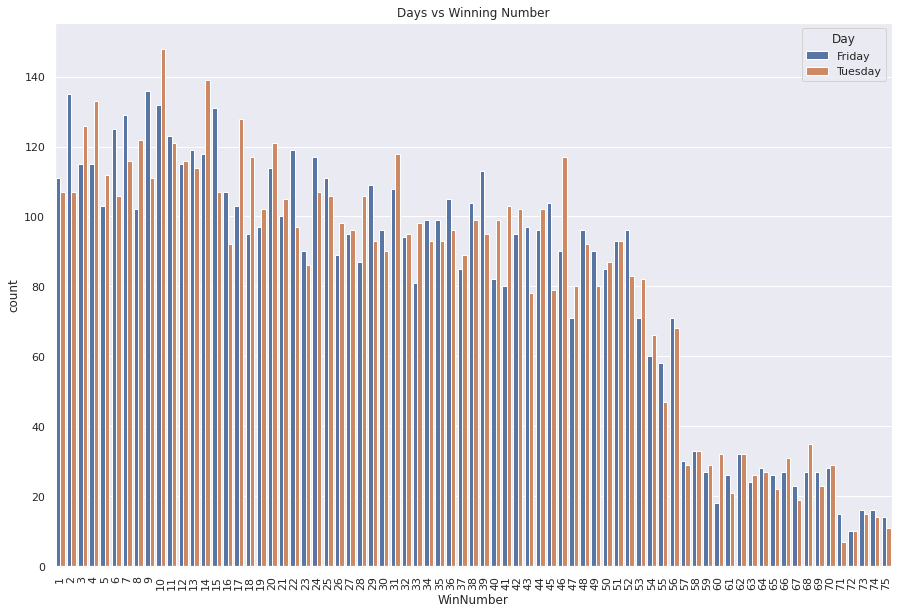

In [32]:
plt.figure(figsize=(15,10))
sns.countplot(x="WinNumber", hue="WeekdayEncoded", data=Winning_Numbers2)
plt.legend(title='Day', loc='upper right', labels=['Friday', 'Tuesday'])
plt.title('Days vs Winning Number')
plt.xticks(rotation = 'vertical')
plt.show()

## The Kde plot showing the Winning Numbers Distrubution.We can see that median is at winning number 10.

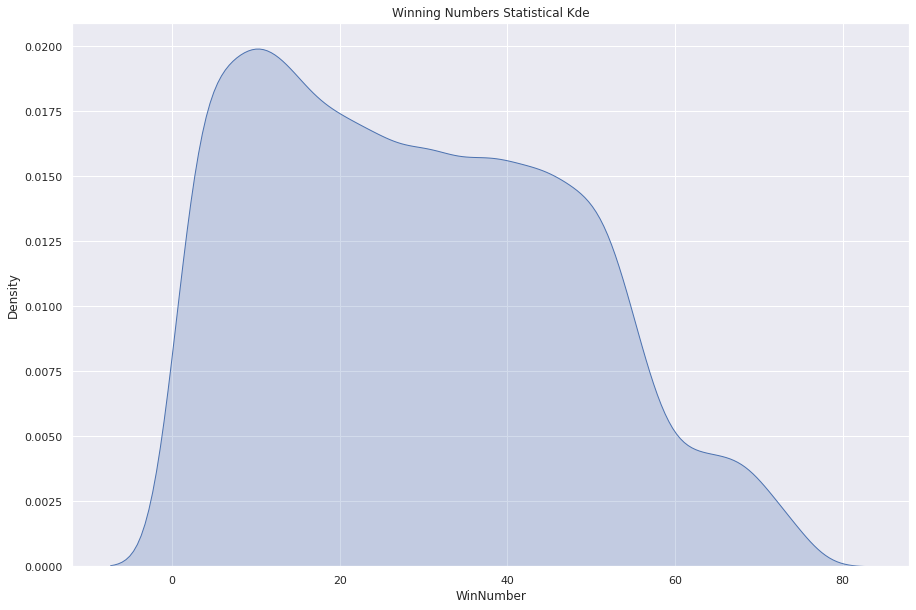

In [30]:
plt.figure(figsize=(15,10))
import numpy as np
sns.kdeplot(Winning_Numbers2["WinNumber"],shade=True)
plt.title('Winning Numbers Statistical Kde')
plt.show()

In [19]:
import scipy.stats as stats

In [20]:
fvalue, pvalue = stats.f_oneway(Winning_Numbers2["WinNumber"], Winning_Numbers2['WeekdayEncoded'])
print(pvalue)


0.0


In [21]:
most_frequent = Winning_Numbers2['WinNumber'].value_counts()[:20].sort_values(ascending=False)


In [22]:
most_frequent_df = pd.DataFrame(most_frequent)

In [23]:
most_frequent_df.index.names = ['WinNumbers']

In [24]:
most_frequent_df

,WinNumber
WinNumbers,
10,280
14,257
4,248
9,247
7,245
11,244
2,242
3,241
15,238


In [35]:
most_frequent_df = most_frequent_df.rename(columns={"WinNumber": "Frequency"})

## Top 20 Most Occuring Winning Number 

In [33]:
most_frequent_df.reset_index()

,WinNumbers,Frequency
0,10,280
1,14,257
2,4,248
3,9,247
4,7,245
5,11,244
6,2,242
7,3,241
8,15,238
9,20,235


## Scatterplot showing the spread of the 20 top most frequently occurring Winning Numbers

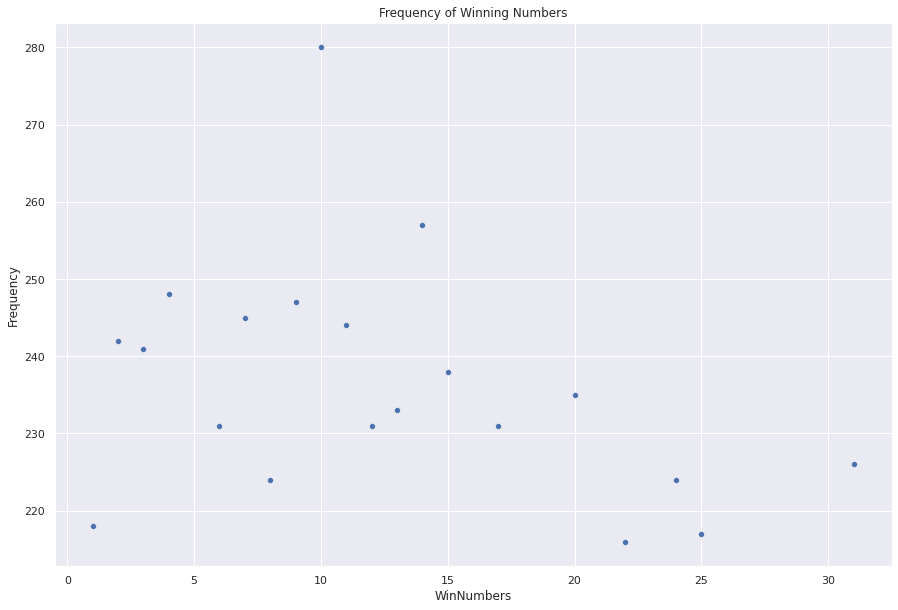

In [31]:

plt.figure(figsize=(15,10))
sns.scatterplot(data=most_frequent_df, x="WinNumbers", y="Frequency",palette='Spectral')
plt.title('Frequency of Winning Numbers')
sns.set(style = "darkgrid")
plt.show()